# TP1 D'Optimisation :  Backtracking & Steepest_Descent

In [34]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#create quadratic 2D problem

In [35]:
def gradient(x):
    return np.dot(P,x) + q

In [36]:
def optimal_step(x,grad):
    num = grad.T@grad
    denom = grad.T@P@grad
    return num/denom

# 1) Backtracking & Cas n°1 Lambda={1,2}

In [37]:
def quadratic_problem2d_back(Lambda):
    np.random.seed(seed=1)
    A = np.random.rand(2,2)
    Q,R = np.linalg.qr(A)
    L = np.diag(Lambda)
    P = Q.T@L@Q
    # with P definite positive
    q = np.random.rand(2,1)
    r = np.random.rand(1) 
   
    return P,q,r

In [38]:
def cost(x):
    cout = .5*x.T@P@x + x.T@q + r
    return cout[0]

In [135]:
def backtrack(x,d,cost,crit,sigma0,c,rho,fig = True): #remplacer d par grad  
    sigma_list = [sigma0]
    #d = -grad
    sigma = sigma0
    flist = [cost(x + sigma * d)]
    while cost(x + sigma * d) > cost(x) + c * sigma * crit :
        sigma = rho * sigma
        cout = cost(x + sigma * d)
        sigma_list.append(sigma)
        flist.append(cout) 

    if fig == True:      
        return sigma, sigma_list, flist          
    else :
        return sigma

In [40]:
def afficher_backtrack(sigma0,c,rho):
    Lambda = np.array((1,2))
    P,q,r= quadratic_problem2d_back(Lambda)
    # check solution existency 
    xstar = -np.dot(np.linalg.inv(P),q)

    x0 = np.copy(xstar) + 5*(np.random.rand(2,1)-.5)

    grad = gradient(x0)
    crit = -grad.T@grad 

    sigma,sigma_list,flist = backtrack(x0,-grad,cost,crit,sigma0,c,rho,fig = True) 

    sigma_wolfe = (0,sigma0)
    fwolfe  = (cost(x0), cost(x0) + c*sigma0*crit) #+

    sigma_grid = []
    fgrid = []
    for i in np.arange(0,sigma0+0.05,0.05):
        sigma_grid.append(i)
        fgrid.append( cost(x0 - i*grad))

    plt.figure(1)
    plt.plot(sigma_grid,fgrid,'-b',label = 'fonction de coût évaluée suivant 'r'$\sigma$')
    plt.plot(sigma_list,flist,'ro',label = 'suite de points du backtrack')   
    plt.plot(sigma_wolfe,fwolfe,'r-',label = 'droite de la condition W1' )
    plt.plot(optimal_step(x0,grad),cost(x0 - optimal_step(x0,grad)*grad),'yd', label = 'pas optimal')

    plt.title("Backtrack algorithm, c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel(r'$\sigma$')
    plt.ylabel("f("r'$\sigma$'")")
    plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


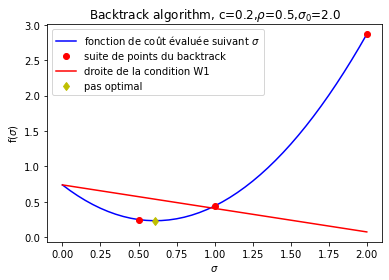

In [41]:
# sigma0, c rho, P
afficher_backtrack(2.,.2,0.5)

##  Essayons de faire varier nos paramètres :

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

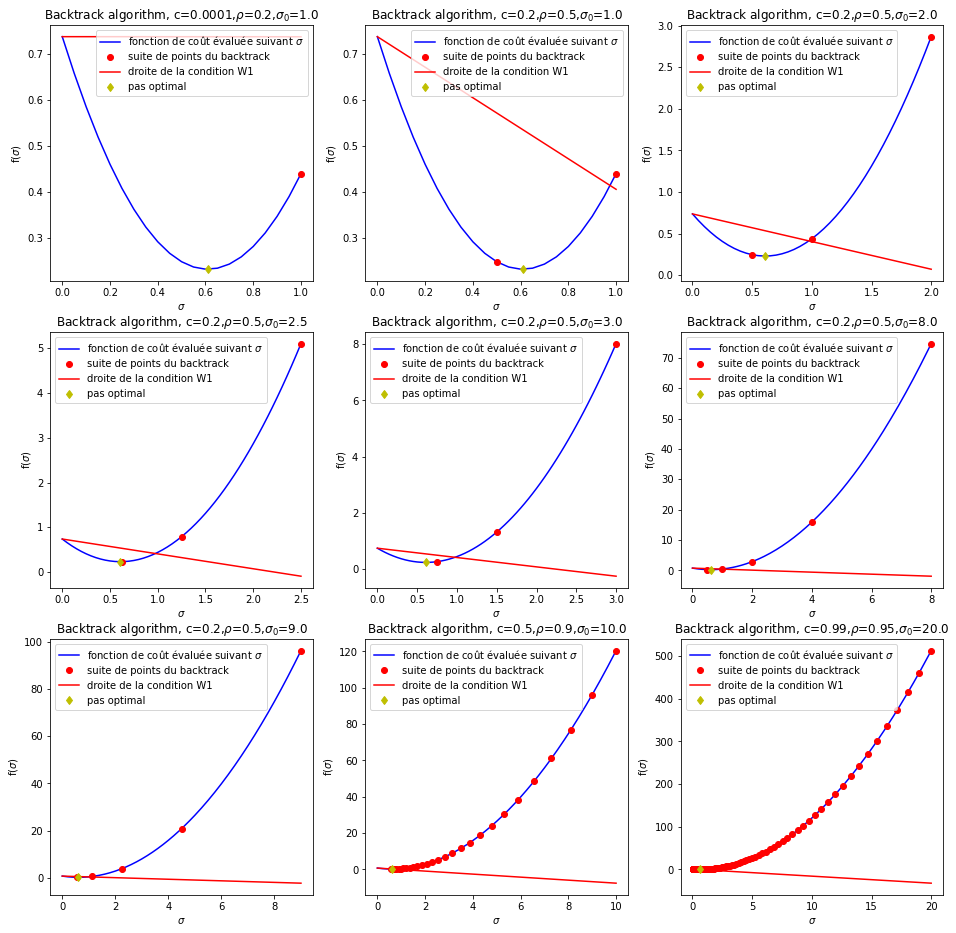

In [203]:
#liste_sigma[0], liste_C et, liste_Rho
liste_param = [[1.,1.,2.,2.5,3.,8.,9.,10.,20.], 
          [0.0001, .2,.2,.2,.2,.2,.2,.5,0.99],
          [0.2,0.5,0.5,0.5,0.5,0.5,0.5,0.9,0.95]]

fig = plt.figure(1,figsize=(16,16))
for i in range(9):
    fig = plt.subplot(3,3,i+1)
    afficher_backtrack(liste_param[0][i],liste_param[1][i],liste_param[2][i])

### Conclusion

(_) : quelque chose   

    - On peut remarquer à la 6e et 7e figure que nous avons un X(k) minimale, qui est égale à 0._ lorsque c=0.2 (W1), rho=0.5 et, sigma0=8.
    - En effet, lorsque c=0.2 et, rho=0.5; si notre sigma est petit forcément nous aurons la droite de W1 au dessus de la courbe et la méthode va rapidement nous proposer un minimum, par contre lorsque sigma est grand on peut remarquer que cette même droite commence, petit à petit à être en bas d ela courbe, cela veut tout simpleme,nt dire que la méthode converge très lentement vers le minimum global rercherché.

A partir de ce commentaire, on peut par observation et intuition deviner ou comprendre ce qui l'en est des autres cas où les valeurs des différents paramètres varient.

# SteepestDescent & Cas n°2 Lambda={1,1001}; Cas n°3 Lambda={1,10} et cas Cas n°4 Lambda={1,100}

In [74]:
def quadratic_problem2d_step(Lambda):
    A = np.random.rand(2,2)
    Q,R = np.linalg.qr(A)
    L = np.diag(Lambda)
    P = Q.T@L@Q
    # with P definite positive
    q = np.random.rand(2,1)
    r = np.random.rand(1) 
    return P,q,r

In [75]:
def cost_step(x):
    if x.ndim == 1 :
        x = np.matrix(x).T
    cout = .5*x.T@P@x + x.T@q + r
    return cout[0][0]

In [182]:
def steepest_descent_pre(x0,cost,gradient,sigma0,c,rho,method):
    #xlist : list of points
    #flist : list of cost functions
    #nlist : list of gradient norms (stop)
    k=0
    X = x0 
    grad = gradient(X)#-gradient(X)
    xlist = [X]
    flist = [cost_step(X)]
    nlist = [np.linalg.norm(grad)]
    while(np.linalg.norm(grad)>e and k<100):
        d = gradient(X) #-gradient(X)
        if method==optimal_step:
            sigma = method(X,gradient(X))            
            flist.append(cost_step(X))
        else :
            crit = -grad.T@grad 
            sigma, sigma_list, flist = method(X,-d,e,cost,crit,sigma0,c,rho,fig = True)
            flist.append(cost_step(X)) 
        X = X + np.asarray(sigma) * d #X + np.asarray(sigma) * d
        xlist.append(X)
        nlist.append(np.linalg.norm(gradient(X)))
        k = k + 1         
        
    return xlist,flist,nlist

In [192]:
#backtrack redefinit
def backtrack2(x,grad,cost,crit,sigma0,c,rho,fig = True):
    i = 0
    d = -grad
    sigma = sigma0
    sigma_list = [sigma]
    flist = [cost(x + sigma * d )]
    while cost(x + sigma * d ) > cost(x) - c * sigma * crit + 1e-16 and i <= 100: #W1
        sigma = rho * sigma
        sigma_list.append(sigma)
        flist.append(cost(x + sigma * d ))
        i += 1
    if fig == True:      
        return sigma, sigma_list, flist          
    else :
        return sigma

In [193]:
def steepest_descent(x0,e,cost,gradient,method,sigma0, c, rho):
    k = 0
    xk = x0
    nlist = [np.linalg.norm(gradient(xk))]
    xlist = [xk]
    flist = [cost(xk)]
    while np.linalg.norm(gradient(xk)) > e and k < 100:
        d = -gradient(xk)
        if method == backtrack2:
            sig = method(xk,gradient(xk),cost,np.linalg.norm(gradient(xk)),sigma0,c,rho,fig = False)
            flist.append(cost(xk))
        else:
            sig = method(xk,gradient(xk))
            flist.append(cost(xk))
        xk = xk + sig * d
        xlist.append(xk)
        nlist.append(np.linalg.norm(gradient(xk)))
        k += 1
    return xlist,flist,nlist

In [204]:
# Lambda(1,n), e=1e-13 (precision), c, rho, methode 
def afficher_step(n,e,sigma0,c,rho,methode):
    Lambda = np.array((1,n))
    np.random.seed(seed=1)
    P,q,r= quadratic_problem2d_step(Lambda)
    # check solution existency 
    xstar = -np.dot(np.linalg.inv(P),q)
    fmin  = cost(xstar)
    ax= xstar[0]
    bx = xstar[0]
    ay= xstar[1]
    by = xstar[1]
    for test in range(5):
        x0 = np.copy(xstar) + 2.*(np.random.rand(2,1)-.5)
        #

        xlist, flist, nlist = steepest_descent(x0,e,cost,gradient,methode,sigma0, c, rho)
        #xlist,flist,nlist =  steepest_descent(x0, e,cost,gradient,sigma0,c,rho,methode)
        xlist = np.asarray(xlist)
        #
        fig = plt.figure(1) 
        plt.subplot(1,3,1)
    #    plt.plot(xlist[0:2,0], xlist[0:2,1],'o-',label='points')
        plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
        plt.title("Sequence of points, \n"r'$\sigma_0$'"="+str(sigma0)+", c="+str(c)+","r'$\rho$'"="+str(rho))
    #    #
        ax = np.min((xlist[:,0,0].min(),ax))-.1
        bx = np.max((xlist[:,0,0].max(),bx))+.1
        ay = np.min((xlist[:,1,0].min(),ay))-.1
        by = np.max((xlist[:,1,0].max(),by))+.1

        plt.subplot(1,3,2)
        plt.semilogy(range(len(flist)),flist-fmin+1e-16)
        plt.title("Evolution  of cost \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
        plt.xlabel('iterations')
        plt.ylabel(r'$f(x^k)$')

        plt.subplot(1,3,3)
        plt.semilogy(nlist,':')
        plt.title("Evolution of gradient norm \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
        plt.xlabel('iterations')
        plt.ylabel(r'$f(x^k)$')
    #    
    xgrid = np.arange(ax,bx,(bx-ax)/50)
    ygrid = np.arange(ay,by,(by-ay)/50)
    X, Y = np.meshgrid(xgrid, ygrid)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

    plt.subplot(1,3,1)
    plt.contour(X, Y, Z,21)

    plt.plot(xstar[0], xstar[1],'*',label='points')
    plt.show()
    print("xk = "+str(xlist[-1]))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\User\AppData\Local\Temp/ipykernel_16252/1389945380.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or

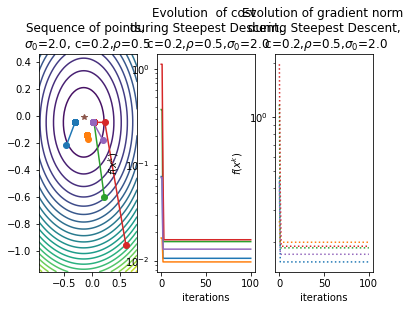

xk = [[ 0.02367627]
 [-0.04614268]]


In [205]:
# Lambda(m,n), e=1e-13 (precision), sigma0, c, rho, methode 
afficher_step(10,1e-16,2.,.2,0.5,backtrack2)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\User\AppData\Local\Temp/ipykernel_16252/1389945380.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or

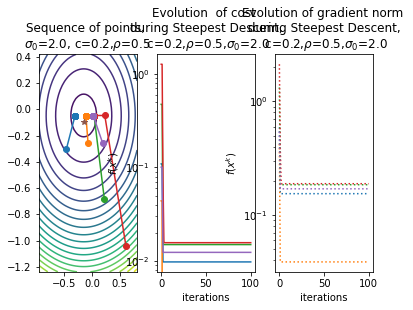

xk = [[ 0.02367627]
 [-0.04614268]]


In [206]:
# Lambda(m,n), e=1e-13 (precision), sigma0, c, rho, methode 
afficher_step(1.0001,1e-16,2.,.2,0.5,backtrack2)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\User\AppData\Local\Temp/ipykernel_16252/1389945380.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
C:\Users\User\AppData\Local\Temp/ipykernel_16252/1389945380.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

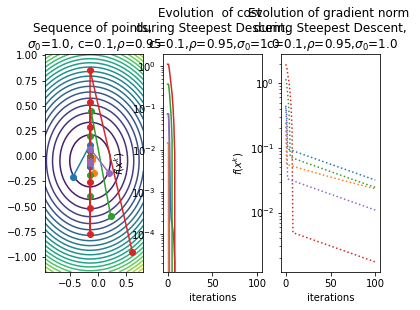

xk = [[-0.14676705]
 [-0.05165016]]


In [207]:
# Lambda(m,n), e=1e-13 (precision), sigma0, c, rho, methode 
afficher_step(100,1e-16,1.,.1,0.95,backtrack2)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\User\AppData\Local\Temp/ipykernel_16252/1389945380.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or

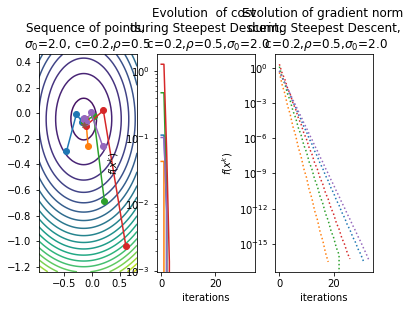

xk = [[-0.14676855]
 [-0.04618943]]


In [208]:
# Lambda(m,n), e=1e-13 (precision), sigma0, c, rho, methode 
afficher_step(1.0001,1e-16,2.,.2,0.5,optimal_step)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\User\AppData\Local\Temp/ipykernel_16252/1389945380.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
C:\Users\User\AppData\Local\Temp/ipykernel_16252/1389945380.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

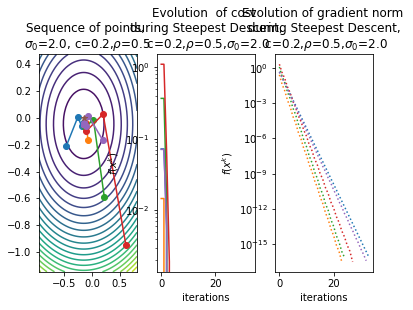

xk = [[-0.14676855]
 [-0.04618943]]


In [209]:
# Lambda(m,n), e=1e-13 (precision), sigma0, c, rho, methode 
afficher_step(100,1e-16,2.,.2,0.5,optimal_step)

### Conclusion

On à peu près dans les deux cas et avec une variation de paramètre comme valeure approximative de (-0.146,-0.0461) notre minimum global.